# Importer les librairies

In [12]:
using PyPlot: pygui
pygui(true)
using Plots
pyplot()

using SparseArrays
using LightGraphs
using SimpleWeightedGraphs

include("Parsers.jl")
include("Resolution.jl")
include("Resolution_clusters.jl")
include("plot.jl")
include("Algo_en_ligne.jl")


algo_pseudo_en_ligne (generic function with 6 methods)

# Importer les fichiers de données

In [2]:
file_directory = "/Users/gache/Documents/ENPC/2A/semestre_2/Projet_IMI/git/Data/Villages/"
client_file_name = joinpath(file_directory, "customer_requests.csv")
driver_file_name = joinpath(file_directory, "driver_shifts.csv")
map_file_name = joinpath(file_directory, "mTSP_matrix.csv")
gamma_file_name = joinpath(file_directory, "gammas.csv")
node_coordinates_file_name = joinpath(file_directory, "node_coordinates.csv")

"/Users/gache/Documents/ENPC/2A/semestre_2/Projet_IMI/git/Data/Villages/node_coordinates.csv"

# Parser les données, affichage des arrêts de bus

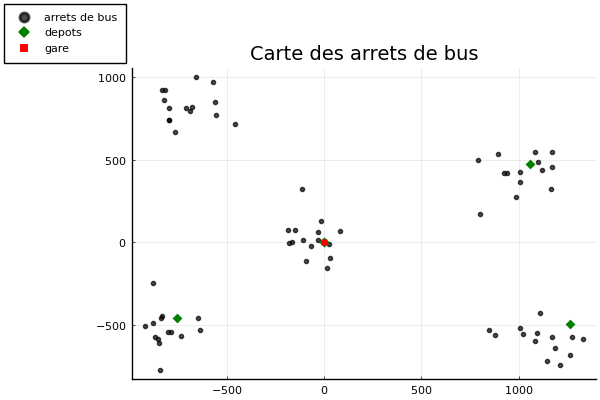

In [3]:
loc = build_localisations(node_coordinates_file_name)
depots, gare = build_drivers_and_gare(driver_file_name)
people = build_people_real_file_only_client(client_file_name, driver_file_name, map_file_name, gamma_file_name, false)
mappy,n = parser_real_file(map_file_name)
nb_buses = length(depots)
plot_bus_stops(loc, depots, gare)

# Construction des clusters avec hierarchical clustering

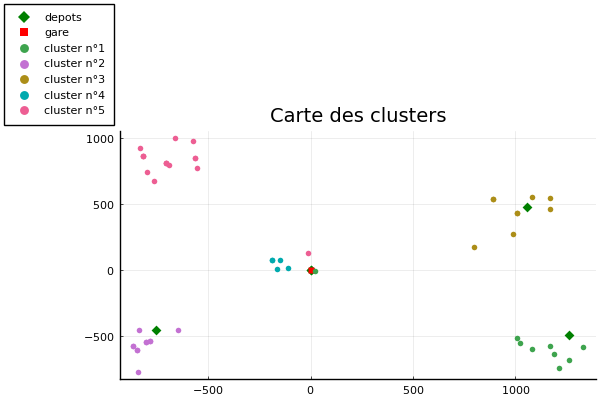

In [4]:
metric = angle_max
sol = hierarchical_clustering(people, mappy, gare, depots, 20, nb_buses, metric)
pl = plot_terminus(loc, depots, gare)
p_hierarchical_clustering = plot_clusters(sol, loc, pl, true)

# Construction des bus

In [6]:
buses = compute_solution(sol)
println(buses)
total_time = get_total_time.(buses)
println(total_time)
println(sum(total_time))

Academic license - for non-commercial use only - expires 2021-07-02
Academic license - for non-commercial use only - expires 2021-07-02
Academic license - for non-commercial use only - expires 2021-07-02
Academic license - for non-commercial use only - expires 2021-07-02
Academic license - for non-commercial use only - expires 2021-07-02
Bus[Bus : 1
   stops : 
       1
       19
       23
       18
       17
       31
       20
       28
       26
       71
       1
, Bus : 2
   stops : 
       54
       52
       53
       60
       55
       51
       59
       58
       1
, Bus : 3
   stops : 
       38
       46
       36
       34
       33
       32
       42
       45
       1
, Bus : 4
   stops : 
       54
       72
       70
       69
       66
       1
, Bus : 5
   stops : 
       1
       2
       11
       16
       7
       10
       3
       15
       14
       12
       4
       64
       1
]
[3158.6319999997104, 1652.1169999998601, 1831.0139999999847, 1044.01200000000

# Insertion successive des clients

Instance Padam, capacité des bus de 20 personnes, distance calculée avec l'angle maximal et hierarchical clustering

In [13]:
file_dir = "/Users/gache/Documents/ENPC/2A/semestre_2/Projet_IMI/git/Data/Instance Padam/"
algo_pseudo_en_ligne(file_dir, dist_src_dst,  angle_max,false, true, 20)

Importation des données...
Fin de l'importation des données.
Academic license - for non-commercial use only - expires 2021-07-02


LoadError: UndefVarError: p_hierarchical_clustering_bus not defined

Instance Padam, capacité des bus de 30 personnes, distance calculée avec l'angle maximal et hierarchical clustering

In [ ]:
file_dir = "/Users/gache/Documents/ENPC/2A/semestre_2/Projet_IMI/git/Data/Instance Padam/"
algo_pseudo_en_ligne(file_dir, dist_src_dst,  angle_max,false, true, 30)

Instance Padam, capacité des bus de 20 personnes, distance calculée avec dist_src_dst et creation_cluster

In [ ]:
file_dir = "/Users/gache/Documents/ENPC/2A/semestre_2/Projet_IMI/git/Data/Instance Padam/"
algo_pseudo_en_ligne(file_dir, dist_src_dst,  angle_max,true, true, 20)